Simulation of a one dimensional porous structure using the FTCS scheme
---
The FDM relies on approximating the partial differential terms with spatial discretizations. For example the forward difference approximation:

$$\frac{\partial c \left(x , y, z, t\right)}{ \partial x} \approx \frac{c\left(x + \Delta x, y, z, t\right) - c\left(x , y, z, t\right)}{\Delta x} $$

We will be using the central difference approximation for, the first and second order central difference approximations are given by

$$\frac{\partial c \left(x , y, z, t\right)}{ \partial x} \approx \frac{c\left(x + \frac{1}{2} \Delta x, y, z, t\right) - c\left(x - \frac{1}{2} \Delta x , y, z, t\right)}{\Delta x}  $$

$$\frac{\partial^2 c  \left(x , y, z, t\right)}{ \partial x^2} \approx \frac{c\left(x + \frac{1}{2}\Delta x, y, z, t\right) -2  c\left(x,y,z,t\right) + c\left(x - \frac{1}{2}\Delta x , y, z, t\right)}{ \Delta x^2}  $$

The finite difference method can be interpreted as a discretization of the continuous real space into a finite set of discreetly defined volumes. For example consider mass transfer in a one dimensional structure of length $L$ along the $x$-axis $x \in [0, L] \subset \mathbb{R} $ into a total of $\textrm{N}$ discrete elements $x = \{x_i ~|~ i \in [0, \textrm{N}) \subset \mathbb{N} \}$ ( or $= \{x_0, x_1, x_2 \dots, x_{\textrm{N} - 1} \}$ )

We will use the following notation: the subscripts $i, j, k$ represent the discrete elements for the three spatial coordinates $x, y, z$ respectively at a specific time $t$ written as $c_{i, j, k} (t)$. 
If we choose the first discrete element $i = 0$ to be on the cartesian origin, then each discrete elemenent has the following corresponding position in the continuous domain

$c_{0, j, k} (t) = c(0, y, z, t)$,

$c_{1, j, k} (t) = c(\Delta x, y, z, t)$,

$c_{2, j, k} (t) = c(2  \Delta x, y, z, t)$

$ \vdots $

$c_{N, j, k} (t) = c(N  \Delta x, y, z, t)$. 

The three dimensional conduction equation becomes

$$\frac{1}{\alpha}\frac{\partial c_{i, j, k}}{ \partial t} = \frac{c_{i + 1, j, k} - 2 c_{i,j,k} + c_{i - 1, j, k} }{\Delta x^2} + \frac{c_{i , j + 1, k} - 2 c_{i,j,k} + c_{i, j  - 1, k} }{\Delta y ^2} + \frac{c_{i , j , k+ 1} - 2 c_{i,j,k} + c_{i, j  , k- 1} }{\Delta z^2} $$

the two dimensional conduction equation is written as (suppressing the third suscript)

$$\frac{1}{\alpha}\frac{\partial c_{i, j}}{ \partial t} = \frac{c_{i + 1, j} - 2 c_{i,j} + c_{i - 1, j} }{\Delta x^2} + \frac{c_{i , j + 1} - 2 c_{i,j} + c_{i, j  - 1} }{\Delta y^2} $$

the one dimensional conduction equation is simply

$$\frac{1}{\alpha}\frac{\partial c_{i}}{ \partial t} = \frac{c_{i + 1} - 2 c_{i} + c_{i - 1} }{\Delta x^2} $$

which can be represented in more compact matrix notation
$$
\frac{ \partial C}{\partial t} = A~\vec{C}
$$
where 
$$
A = \frac{1}{\Delta x^2} \left( \begin{array}{cccccccc}-2 & 1 & 0 & 0 & \ldots & 0 & 0 & 0 \\1 & -2 & 1 & 0  & \ldots & 0 & 0 & 0 \\0 & 1 & -2 & 1 & \ldots & 0 & 0 & 0 \\\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\0 & 0 & 0 & 0 & \ldots & 1 & -2 & 1 \\0 & 0 & 0 & 0 & \ldots & 0 & 1 & -2 \end{array} \right)
$$
and
$$
\vec{U}= \left( \begin{array}{c} c_0 \\ u_1 \\ u_2 \\ \vdots \\ u_{N - 1} \\ u_N \end{array} \right)
$$


Returning to the three dimensional case we now have a set of $\textrm{N} \times \textrm{N} \times \textrm{N}$ semi-discrete autonomous ordinary differential equations

$$\frac{\textrm{d}c_{i, j, k}}{\textrm{d} t} = \alpha \left( \frac{c_{i + 1, j, k} - 2 c_{i,j,k} + c_{i - 1, j, k} }{\Delta x^2} + \frac{c_{i , j + 1, k} - 2 c_{i,j,k} + c_{i, j  - 1, k} }{\Delta y ^2} + \frac{c_{i , j , k+ 1} - 2 c_{i,j,k} + c_{i, j  , k- 1} }{\Delta z^2} \right) $$

We can choose to discretize the space as $\Delta x = \Delta y = \Delta z$ producing 

\begin{align}
\frac{\textrm{d}c_{i, j, k}}{\textrm{d} t} =& \alpha \left( \frac{c_{i + 1, j, k} - 2 c_{i,j,k} + c_{i - 1, j, k}  + c_{i , j + 1, k} - 2 c_{i,j,k} + c_{i, j  - 1, k}  + c_{i , j , k+ 1} - 2 c_{i,j,k} + u_{i, j  , k- 1} }{\Delta x^2} \right) \\
=& \alpha \left( \frac{c_{i + 1, j, k} + c_{i - 1, j, k}  + c_{i , j + 1, k} + c_{i, j  - 1, k}  + c_{i , j , k+ 1}  + c_{i, j  , k- 1} - 6 c_{i,j,k} }{\Delta x^2} \right)
\end{align}


We can simulate these equations using another approximation method, we will use a forward difference approximation for time which is identical to the Euler method. Together with the central difference spatial discretization, this method is known as the FTCS (Forward-Time Central-Space) scheme.

$$\frac{\textrm{d} c_{i, j, k} }{\textrm{d} t}  \approx \frac{c_{i, j, k} \left(t + \Delta t \right)  -c_{i, j, k} \left(t \right) }{\Delta t} $$

Finally we obtain the computational set of algebraic equations for all $i, j, k$

$$c_{i, j, k} \left(t + \Delta t \right) = \Delta t \left( \alpha \left( \frac{u_{i + 1, j, k} + u_{i - 1, j, k}  + u_{i , j + 1, k} + c_{i, j  - 1, k}  + c_{i , j , k+ 1}  + c_{i, j  , k- 1} - 6 c_{i,j,k} }{\Delta x^2} \right) \right) + c_{i, j, k} \left(t \right)$$

The FTCS is known to converge *iff* $\alpha \Delta t \leq \frac{1}{2} \Delta x^2$.




In [119]:
import numpy
# Physical parameters
L = 500  # Length of (symmetric) porous structure, nm  
time = 30 # Time to simulate, ns
alpha_eff = 0.214 * (1e5)  # Diffusivity coefficient in porous structure, nm2 ns-1
alpha = 24219.103666817566  # Diffusivity coefficient in free space, nm2 ns-1

# Discretization parameters
# Space in 1-dimensional porous structure
N = 70  # Number of discrete spatial elements
x = numpy.linspace(0, L, N + 1)  # A vector of discrete points in space
dx = x[1] - x[0]

# Space in 3-dimensional open boundary
N_ext = 40
x_ext_ = numpy.linspace(0, 2000, N_ext + 1)  # A vector of discrete points in space
dx_ext = x_ext_[1] - x_ext_[0]
dy = dx_ext 
dz = dx_ext 

x_ext, y, z = numpy.meshgrid(x_ext_, x_ext_, x_ext_)

# Time
dt = 1/(2 * alpha) * dx**2
Nt = int(time/dt)

tspan = numpy.linspace(0, time, Nt + 1)  # mesh points in time
dt = tspan[1] - tspan[0]

u = numpy.zeros(N + 1)  # unknown u at new time level

# Initial conditions                                    
def IC(x):
    if (x <= 500):
        return (4/numpy.pi) * numpy.sin((numpy.pi * (x + 500)/1000))
    else:
        return 0.0 
    
for ind, xas in enumerate(x):  # Distribute IC
    u[ind] = IC(xas)


def IC_ext(x, y, z):
    return 0 * x +  0 * y + 0 * z

u_ext = IC_ext(x_ext.T, y.T, z.T)

# Boundary conditions
def BC_1(u, t):  # Boundary condition at x = 0 (element u_0)
    return u[1]

m_i = int(N_ext/2.0)
             
def BC_2(u, u_ext, t):  # Boundary condition at x = L (element u_N)
    u_open = u_ext[m_i, m_i, m_i]
    return ((alpha * (u_open - u[N]) / dx)
                     -(alpha_eff * (u[N] - u[N-1]) / dx)
                           ) / (dx)

def BC_3(u, u_ext, t):  # Boundary condition at x_ext = 0 (element u_N)
    u_open = u_ext[m_i, m_i, m_i]
    return ((alpha * (u_ext[m_i + 1, m_i, m_i] - u_open) / dx)
                          -(alpha * (u_open - u[N]) / dx)
                       ) / (dx)

# Storage containers
u_store = []
t_store = []
t_store.append(tspan[0])
u_store.append(numpy.array(u))


for t in tspan:
    # Compute the diffusion in the porous structure
    u[1:-1] = u[1:-1] + (alpha_eff * (u[:-2] - 2 * u[1:-1] +  u[2:]) / (dx) ** 2) * dt
    
    # Compute the diffusion in outisde the porous structure
    u_ext[1:-1, 1:-1, 1:-1] = (u_ext[1:-1, 1:-1, 1:-1] 
                              + dt * alpha * (u_ext[0:-2,1:-1,1:-1] - 2 * u_ext[1:-1,1:-1,1:-1] + u_ext[2:,1:-1,1:-1]) / (dx_ext)**2
                              + dt * alpha * (u_ext[1:-1,0:-2,1:-1] - 2 * u_ext[1:-1,1:-1,1:-1] + u_ext[1:-1,2:,1:-1]) / (dy)**2
                              + dt * alpha * (u_ext[1:-1,1:-1,0:-2] - 2 * u_ext[1:-1,1:-1,1:-1] + u_ext[1:-1,1:-1,2:]) / (dz)**2
                              )

    u_ext[0, m_i, m_i]
    
    # Compute u at the boundary conditions
    u[0] = BC_1(u, t) 
    u_open = u_ext[m_i, m_i, m_i]
    u_n_increment = ((alpha * (u_open - u[N]) / dx)
                     -(alpha_eff * (u[N] - u[N-1]) / dx)
                           ) / (dx)
    
    u_ext0_increment = ((alpha * (u_ext[m_i + 1, m_i, m_i] - u_open) / dx)
                          -(alpha * (u_open - u[N]) / dx)
                       ) / (dx)
    
    u[N] = u[N] + u_n_increment * dt
    u_ext[m_i, m_i, m_i] = u_ext[m_i, m_i, m_i] + u_ext0_increment * dt
    
    # Save values
    t_store.append(t)
    u_store.append(numpy.array(u))
    

<IPython.core.display.Javascript object>


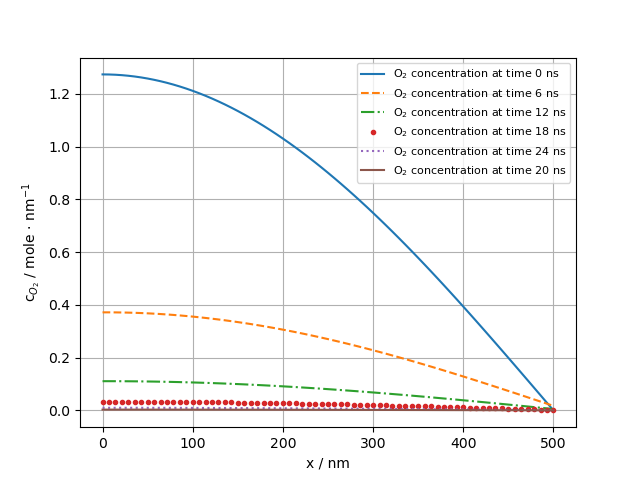

numpy.max(u(t = 0.0)) = 1.2732395447351628
numpy.max(u(t = 6.0)) = 0.37156699763340817
numpy.max(u(t = 12.0)) = 0.11069842438447668
numpy.max(u(t = 18.0)) = 0.03303956531101433
numpy.max(u(t = 24.0)) = 0.009876454724635138


In [123]:
# Contour plots
%matplotlib nbagg
import matplotlib.pyplot as plot
from itertools import cycle
lines = ["-","--","-.",".",":"]
linecycler = cycle(lines)

NL = 5  # Number of countour lines to plot

fig = plot.figure(dpi=100)

for n in range(NL):    
    t = t_store[-1]/NL * n
    u = u_store[int(numpy.shape(u_store)[0]/NL * n)]
    
    print(f'numpy.max(u(t = {t})) = {numpy.max(u)}')
    plot.plot(x, u,next(linecycler), label='O$_2$ concentration at time {} ns'.format(int(t)))

t = t_store[-1]
u = u_store[-1]
#plot.plot(x, u, label=r'\\textit{$c_{O2}$} concentration at time {} ns'.format(int(t)))
plot.plot(x, u, "-", label=r'O$_2$ concentration at time 20 ns')
plot.grid()
plot.xlabel('x / nm')
plot.ylabel('c$_{O_2}$ / mole $\cdot$ nm$^{-1}$')
plot.legend(fontsize=8)
plot.show()

<IPython.core.display.Javascript object>


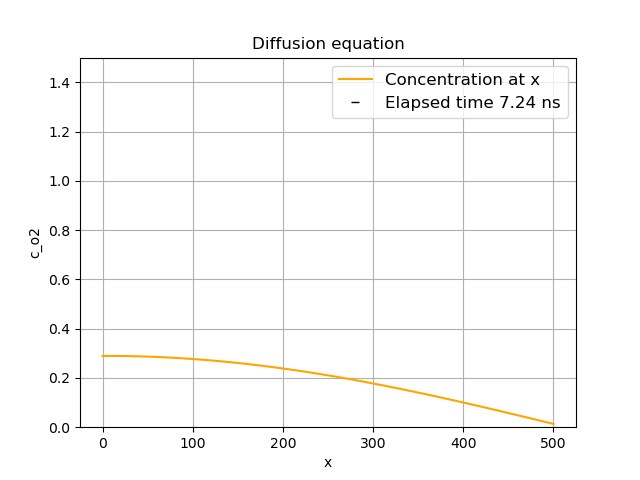

In [124]:
# Animated plot
%matplotlib nbagg
import matplotlib.pyplot as plot
import matplotlib.animation as animation

fig = plot.figure(dpi=100)
ax1 = fig.add_subplot(1,1,1)

def integer_gen(rate=1):
    n = 0
    while True:
        yield n
        n += 1*rate

index = integer_gen()
        
def animate(i):
    """The plot shows the temperature evolving with time at each point x in the rod"""
    try:
        u_t = u_store[next(index)]
    except IndexError:
        return

    ax1.clear()
    plot.plot(x, u_t,'orange',label='Concentration at x')
    plot.plot(0, 300,'k_',label='Elapsed time {} ns'.format(round(t_store[next(index)],2)))
    plot.grid()
    plot.ylim([0, 1.5])
    plot.xlabel('x')
    plot.ylabel('c_o2')
    plot.title('Diffusion equation')
    plot.legend(fontsize=12)
    return

anim = animation.FuncAnimation(fig, animate,frames=360, interval=1)
plot.show()

Exact solutions for  $c^*_{O_2} = 0$ approximiation
---

If Assumption (9) can be used the boundary conditions $ \frac{\partial c_{\textrm{O}_2}}{\partial x}  = c_{\textrm{O}_2} \left(500, t\right) = 0~~\forall t \in (0, \infty)$ are linear and homogeneous, so \autoref{Fick2} admits an exact solution that can be found using separation of variables \citep[pp. 33-62]{farlow1993partial}. First substitute $c_{\textrm{O}_2} \left(x, t\right) = C(x) T(t) $  into the 1-dimensional version of \autoref{Fick2}, after partial differentiation of the substituted functions 
\begin{equation} 
C(x) T'(t) = D_{AB} C''(x) T(t) 
\end{equation}

separate into a time and spatial equations only and set both equations equal to an arbitrary fixed constant $-\lambda^2$

\begin{equation} 
 \frac{T'(t)}{D_{AB} T(t) } =  \frac{C''(x)}{C(x)} = -\lambda^2
\end{equation}

solve the resulting ODE system

\begin{align} 
T'(t) + \lambda^2 D_{AB}  T(t) =&~0   \\
C''(x) + \lambda^2 C (x)  =&  ~0 
\end{align} 

providing

\begin{align}
T(t) =&~ A \mathrm{e}^{-\alpha k^2 t}  \\
C(x)  =& A \sin \left(\lambda x \right) +  B \cos \left(\lambda x \right) 
\end{align} 

substitution into $c_{\textrm{O}_2} \left(x, t\right) = C(x) T(t) $ provides a general form of the solution, at this point given the simple initial condition from \autoref{IC} we can find the exact solution by observation and comparison of coefficients 

\begin{equation} \label{eq:exact}
c_{\textrm{O}_2} \left(x, t\right)=  A \mathrm{e}^{-\alpha k^2 t} \sin \left(\lambda  x \right)
\end{equation}

with $A = \frac{4}{\pi}$ and $\lambda = \frac{\pi}{1000}$. \autoref{eq:exact} can be validated by substitution into \autoref{Fick2} and confirming that the left hand side is equal to the right hand side. Finally we compute the time at which the concentration at midway of the structure becomes 0.015 nm$^{-1}$.

\begin{align}
c_{\textrm{O}_2} \left(500, t\right)=&~0.0015 =   A \mathrm{e}^{-\alpha k^2 t} \sin \left( 500 \lambda \right) \\
t =&~21.0~\textrm{ns} ~ 
\end{align} \footnote{(3 significant figures due to parameter $\alpha$ ) }
 % footnote this?
 
  Note that since the concentration profile of \autoref{eq:exact} is always symmetric $\left(\frac{\partial c_{\textrm{O}_2}}{\partial x} = 0 \iff x = \frac{L}{2} \right)$ this value also represents the maximum concentration of $\textrm{O}_2$ at the solved time. Due to the lack of additional peaks and external fluid inflow this implies that $t = 21.03$ is the only unique solution for which $c_{\textrm{O}_2} \left(500, t\right)=~0.015$ (or  $c_{\textrm{O}_2} \left(0, t\right)=~0.015$ when the symmetric domain is considered).
 

In [ ]:
def u_exact(x, t):
    alpha = 0.214 * (1e14)  # Thermal diffusivity 0.214 nm2 s-1

    k = numpy.pi / 1000.0
    Q = 1.2732395447351628
    a =  alpha * k**2
    return Q * numpy.exp(-a*t) *  numpy.sin(k * (x + 500))

In [ ]:
import numpy
# Physical parameters
L = 0.0001  # length in cm = 1000 nm
L = 500
#time = 1e-9  # s

#L = 0.00005  # length in cm = 1000 nm
time = 1e-9  # s
#time = 1e-7  # s
time = 3e-8  # s
alpha = 1.6563 * 1e-4  # Thermal diffusivity m2 s-1
alpha = 0.214  # Thermal diffusivity 0.214 cm2 s-1
alpha = 0.214 * (1e14)  # Thermal diffusivity 0.214 nm2 s-1
#h = 1500  # Convection coefficient silver -> water W m-2 K-1
#Tw = 298  # Temperature of water reservoir inside reactor at x = L

# Discretization parameters
# Space
N = 30  # Number of discrete spatial elements
N = 50
x = numpy.linspace(0, L, N + 1)  # A vector of discrete points in space
dx = x[1] - x[0]

# Time
dt = 1/(2 * alpha) * dx**2
Nt = int(time/dt)

tspan = numpy.linspace(0, time, Nt + 1)  # mesh points in time
dt = tspan[1] - tspan[0]

u = numpy.zeros(N + 1)  # unknown u at new time level

# Initial conditions
def IC(x):
    return (4/numpy.pi) * numpy.sin((numpy.pi * (x)/L))

#u = IC(x)  # Set initial condition u(x,0) = IC(x)
                                    
def IC(x):
    if (x <= 500):
        return (4/numpy.pi) * numpy.sin((numpy.pi * (x + 500)/1000))
    else:
        return 0.0 
    
for ind, xas in enumerate(x):
    u[ind] = IC(xas)
                                    
                                    
# Boundary conditions
def BC_1(u, t):  # Boundary condition at x = 0 (element u_0)
    return u[1]#298

def BC_2(u, t):  # Boundary condition at x = L (element u_N)
    return 0#(u[-2] + dx * h * Tw) / (1 + dx * h)

# Storage containers
u_store = []
t_store = []
t_store.append(tspan[0])
u_store.append(numpy.array(u))

for t in tspan:
    # Compute u at inner discrete points at the current time step
    # Compute u at the boundary conditions
    #"u[0] = BC_1(u, t)
    u[N] = BC_2(u, t)  
    
    if t > 0:
        u = u_exact(x, t)
    
    #u[0] = 0.5 * (1 - scipy.special.erf(-x/numpy.sqrt(4*alpha*t)))
    #u[N] = BC_2(u, t)  

    # Save values
    t_store.append(t)
    u_store.append(numpy.array(u))

In [ ]:
# Contour plots
%matplotlib nbagg
import matplotlib.pyplot as plot

NL = 10  # Number of countour lines to plot

fig = plot.figure(dpi=100)

for n in range(NL):    
    t = t_store[-1]/NL * n
    u = u_store[int(numpy.shape(u_store)[0]/NL * n)]
    
    print(f'numpy.max(u(t = {t})) = {numpy.max(u)}')
    plot.plot(x, u, label='O_2 concentration at time {} ns'.format(int(t*1e+9)))
    
plot.grid()
plot.xlabel('x')
#plot.xlim((3000, 4000)) 
plot.ylabel('T / K')
#plot.legend(fontsize=8, loc=2)
plot.legend(fontsize=8)
plot.show()

In [30]:
0.214 *1e5

21400.0

# Simulation of one dimensional external structure

In [96]:
import numpy
# Physical parameters
L = 7000  # Length of (symmetric) porous structure, nm  
time = 30 # Time to simulate, ns
alpha_eff = 0.214 * (1e5)  # Diffusivity coefficient in porous structure, nm2 ns-1
alpha = 24219.103666817566  # Diffusivity coefficient in free space, nm2 ns-1

# Discretization parameters
# Space
N = 500  # Number of discrete spatial elements
x = numpy.linspace(0, L, N + 1)  # A vector of discrete points in space
dx = x[1] - x[0]

# Time
dt = 1/(2 * alpha) * dx**2
Nt = int(time/dt)

tspan = numpy.linspace(0, time, Nt + 1)  # mesh points in time
dt = tspan[1] - tspan[0]

u = numpy.zeros(N + 1)  # unknown u at new time level

# Initial conditions
def IC(x):
    return (4/numpy.pi) * numpy.sin((numpy.pi * (x)/L))

#u = IC(x)  # Set initial condition u(x,0) = IC(x)
                                    
def IC(x):
    if (x >= 3000 and x <= 4000):
        return (4/numpy.pi) * numpy.sin((numpy.pi * (x - 3000)/1000))
    else:
        return 0.0 
    
for ind, xas in enumerate(x):
    u[ind] = IC(xas)
                                    
                                    
# Boundary conditions
def BC_1(u, t):  # Boundary condition at x = 0 (element u_0)
    return 0.0#298

def BC_2(u, t):  # Boundary condition at x = L (element u_N)
    return 0#(u[-2] + dx * h * Tw) / (1 + dx * h)

# Storage containers
u_store = []
t_store = []
t_store.append(tspan[0])
u_store.append(numpy.array(u))

for t in tspan:
    # Compute u at inner discrete points at the current time step
    u[1:-1] = u[1:-1] + (alpha * (u[:-2] - 2 * u[1:-1] +  u[2:]) / (dx) ** 2) * dt
    
    # NOTE: This is the vectorised version of the FTCS,
    # it is equivalent to the following more intuitive for loop over each discrete element:
    # for i in range(1, N):
    #     u[i] = u_old[i] + (alpha * (u_old[i - 1] - 2 * u_old[i] + u_old[i + 1]) / (dx) ** 2) * dt
    # u_old = u
               
        
    # Compute u at the boundary conditions
    u[0] = BC_1(u, t)
    u[N] = BC_2(u, t)  

    # Save values
    t_store.append(t)
    u_store.append(numpy.array(u))

<IPython.core.display.Javascript object>


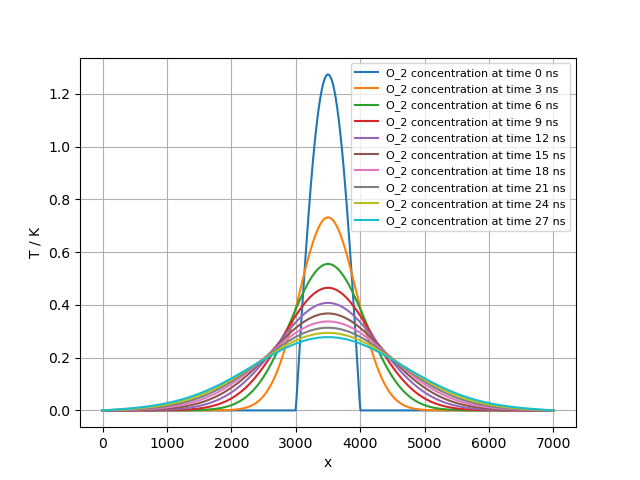

numpy.max(u(t = 0.0)) = 1.2732395447351628
numpy.max(u(t = 3.0)) = 0.7314783121482559
numpy.max(u(t = 6.0)) = 0.5550050177685513
numpy.max(u(t = 9.0)) = 0.46463790845871145
numpy.max(u(t = 12.0)) = 0.40757601990849557
numpy.max(u(t = 15.0)) = 0.36739637121209917
numpy.max(u(t = 18.0)) = 0.33721675682756863
numpy.max(u(t = 21.0)) = 0.31336854577105855
numpy.max(u(t = 24.0)) = 0.2939537752696764
numpy.max(u(t = 27.0)) = 0.2777501348722939


In [99]:
# Contour plots
%matplotlib nbagg
import matplotlib.pyplot as plot

NL = 10  # Number of countour lines to plot

fig = plot.figure(dpi=100)

for n in range(NL):    
    t = t_store[-1]/NL * n
    u = u_store[int(numpy.shape(u_store)[0]/NL * n)]
    print(f'numpy.max(u(t = {t})) = {numpy.max(u)}')
    plot.plot(x, u, label='O_2 concentration at time {} ns'.format(int(t)))
    
plot.grid()
plot.xlabel('x')
plot.ylabel('T / K')
#plot.legend(fontsize=8, loc=2)
plot.legend(fontsize=8)
plot.show()

In [102]:
import numpy
# Physical parameters
L = 21000  # Length of (symmetric) porous structure, nm  
time = 8000 # Time to simulate, ns
alpha_eff = 0.214 * (1e5)  # Diffusivity coefficient in porous structure, nm2 ns-1
alpha = 24219.103666817566  # Diffusivity coefficient in free space, nm2 ns-1

# Discretization parameters
# Space
N = 500  # Number of discrete spatial elements
x = numpy.linspace(0, L, N + 1)  # A vector of discrete points in space
dx = x[1] - x[0]

# Time
dt = 1/(2 * alpha) * dx**2
Nt = int(time/dt)

tspan = numpy.linspace(0, time, Nt + 1)  # mesh points in time
dt = tspan[1] - tspan[0]

u = numpy.zeros(N + 1)  # unknown u at new time level

# Initial conditions
def IC(x):
    return (4/numpy.pi) * numpy.sin((numpy.pi * (x)/L))

#u = IC(x)  # Set initial condition u(x,0) = IC(x)
                                    
def IC(x):
    if (x >= 10500 and x <= 11500):
        return (4/numpy.pi) * numpy.sin((numpy.pi * (x - 10500)/1000))
    else:
        return 0.0 
    
for ind, xas in enumerate(x):
    u[ind] = IC(xas)
                                    
                                    
# Boundary conditions
def BC_1(u, t):  # Boundary condition at x = 0 (element u_0)
    return 0.0#298

def BC_2(u, t):  # Boundary condition at x = L (element u_N)
    return 0#(u[-2] + dx * h * Tw) / (1 + dx * h)

# Storage containers
u_store = []
t_store = []
t_store.append(tspan[0])
u_store.append(numpy.array(u))

for t in tspan:
    # Compute u at inner discrete points at the current time step
    u[1:-1] = u[1:-1] + (alpha * (u[:-2] - 2 * u[1:-1] +  u[2:]) / (dx) ** 2) * dt
    
    # NOTE: This is the vectorised version of the FTCS,
    # it is equivalent to the following more intuitive for loop over each discrete element:
    # for i in range(1, N):
    #     u[i] = u_old[i] + (alpha * (u_old[i - 1] - 2 * u_old[i] + u_old[i + 1]) / (dx) ** 2) * dt
    # u_old = u
               
        
    # Compute u at the boundary conditions
    u[0] = BC_1(u, t)
    u[N] = BC_2(u, t)  

    # Save values
    t_store.append(t)
    u_store.append(numpy.array(u))

<IPython.core.display.Javascript object>


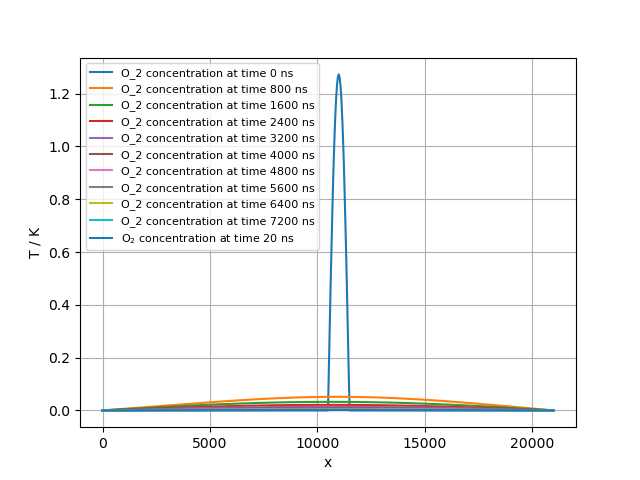

numpy.max(u(t = 0.0)) = 1.2731390150931754
numpy.max(u(t = 800.0)) = 0.051674151751064504
numpy.max(u(t = 1600.0)) = 0.032470382238060605
numpy.max(u(t = 2400.0)) = 0.021029656783303385
numpy.max(u(t = 3200.0)) = 0.01363481494726459
numpy.max(u(t = 4000.0)) = 0.008840994994663736
numpy.max(u(t = 4800.0)) = 0.0057330790424690616
numpy.max(u(t = 5600.0)) = 0.0037177094283504367
numpy.max(u(t = 6400.0)) = 0.0024109100574619857
numpy.max(u(t = 7200.0)) = 0.0015635295729803788


In [104]:
# Contour plots
%matplotlib nbagg
import matplotlib.pyplot as plot

NL = 10  # Number of countour lines to plot

fig = plot.figure(dpi=100)

for n in range(NL):    
    t = t_store[-1]/NL * n
    u = u_store[int(numpy.shape(u_store)[0]/NL * n)]
    print(f'numpy.max(u(t = {t})) = {numpy.max(u)}')
    plot.plot(x, u, label='O_2 concentration at time {} ns'.format(int(t)))

t = t_store[-1]
u = u_store[-1]
#plot.plot(x, u, label=r'\\textit{$c_{O2}$} concentration at time {} ns'.format(int(t)))
plot.plot(x, u, "-", label=r'O$_2$ concentration at time 20 ns')
plot.grid()
plot.xlabel('x')
plot.ylabel('T / K')
plot.legend(fontsize=8)
plot.show()